In [168]:
#PACKAGES FOR DATA PROCESSING AND GRAPHS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [169]:
car_data=pd.read_csv('car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [170]:
car_data.shape

(301, 9)

In [171]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [172]:
car_data['Car_Name'].nunique()

98

In [173]:
car_data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [174]:
car_data['Year'].nunique()

16

In [175]:
car_data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [176]:
car_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [177]:
car_data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [178]:
car_data['Selling_Price'].nunique()

156

In [179]:
brand_mapping_updated = {
    'Maruti Suzuki': ['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza', 's cross', 'alto 800', 
                      'ertiga', 'dzire', 'alto k10', 'ignis', '800', 'baleno', 'omni'],
    'Toyota': ['fortuner', 'innova', 'corolla altis', 'etios cross', 'etios g', 'etios liva', 'corolla', 
               'etios gd', 'camry', 'land cruiser'],
    'Royal Enfield': ['royal enfield thunder 500', 'royal enfield classic 350', 'royal enfield thunder 350', 
                      'royal enfield classic 500', 'royal enfield bullet 350'],
    'KTM': ['ktm rc200', 'ktm rc390', 'ktm 390 duke '],
    'Bajaj': ['bajaj dominar 400', 'bajaj pulsar rs200', 'bajaj avenger 220', 'bajaj avenger 150', 
              'bajaj pulsar 150', 'bajaj avenger 220 dtsi', 'bajaj avenger 150 street', 'bajaj pulsar ns 200', 
              'bajaj pulsar 220 f', 'bajaj pulsar ns 200', 'bajaj pulsar 135 ls', 'bajaj ct 100', 
              'bajaj discover 100', 'bajaj discover 125'],
    'Honda': ['honda cb hornet 160r', 'honda cbr 150', 'honda activa 4g', 'honda dream yuga', 'honda activa 3g', 
              'honda cb trigger', 'honda cb unicorn', 'honda activa 125', 'honda cb shine', 'honda cb twister', 
              'city', 'brio', 'amaze', 'jazz'],
    'TVS': ['tvs apache rtr 160', 'tvs apache rtr 180', 'tvs sport', 'tvs jupyter', 'tvs wego'],
    'Hero': ['hero extreme', 'hero passion x pro', 'hero splender ismart', 'hero passion pro', 'hero honda cbz extreme', 
             'hero splender plus', 'hero glamour', 'hero super splendor', 'hero ignitor disc', 'hero cbz xtreme', 
             'hero hunk', 'hero honda passion pro'],
    'Hyundai': ['i20', 'grand i10', 'i10', 'eon', 'xcent', 'elantra', 'creta', 'verna'],
    'Others': ['um renegade mojave', 'hyosung gt250r', 'mahindra mojo xt300', 'yamaha fz s v 2.0', 
               'yamaha fz 16', 'yamaha fazer', 'yamaha fz v 2.0', 'yamaha fz s', 'suzuki access 125']
}

# Inverting the mapping for easier lookup
model_to_brand_updated = {model: brand for brand, models in brand_mapping_updated.items() for model in models}

# Updating the 'Brand' column in the original dataset based on the new mapping
car_data['Brand'] = car_data['Car_Name'].apply(lambda x: model_to_brand_updated.get(x.lower(), 'Unknown'))

# Checking the updated unique brands
updated_brands = car_data['Brand'].unique()
updated_brands.sort()
updated_brands, car_data.head()


(array(['Bajaj', 'Hero', 'Honda', 'Hyundai', 'KTM', 'Maruti Suzuki',
        'Others', 'Royal Enfield', 'TVS', 'Toyota', 'Unknown'],
       dtype=object),
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
 0     ritz  2014           3.35           5.59       27000    Petrol   
 1      sx4  2013           4.75           9.54       43000    Diesel   
 2     ciaz  2017           7.25           9.85        6900    Petrol   
 3  wagon r  2011           2.85           4.15        5200    Petrol   
 4    swift  2014           4.60           6.87       42450    Diesel   
 
   Selling_type Transmission  Owner          Brand  
 0       Dealer       Manual      0  Maruti Suzuki  
 1       Dealer       Manual      0  Maruti Suzuki  
 2       Dealer       Manual      0  Maruti Suzuki  
 3       Dealer       Manual      0  Maruti Suzuki  
 4       Dealer       Manual      0  Maruti Suzuki  )

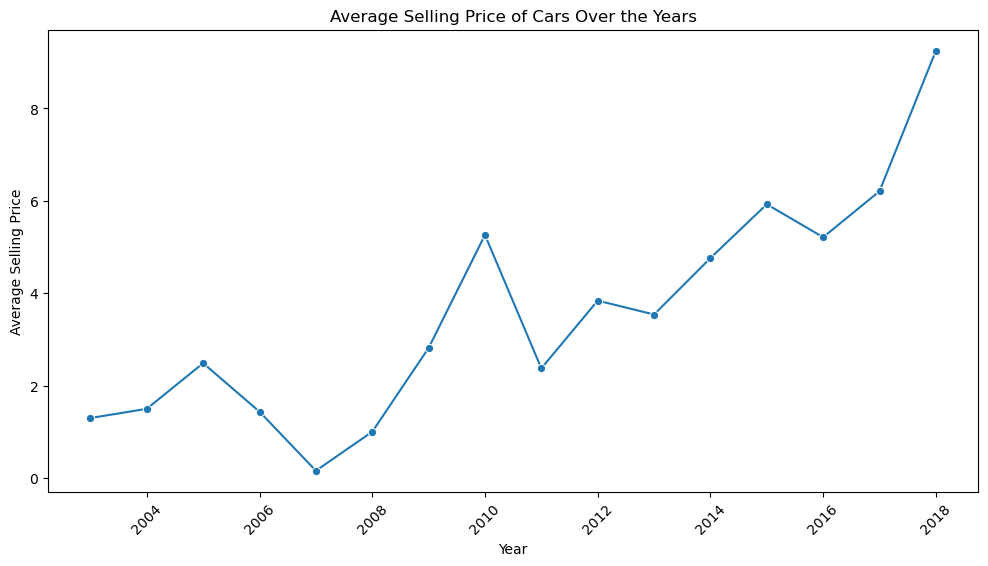

In [180]:
# Creating a line plot for the average selling price over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Selling_Price', data=car_data, estimator='mean', ci=None, marker='o')

plt.title('Average Selling Price of Cars Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)

plt.show()


In [181]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Brand'],
      dtype='object')

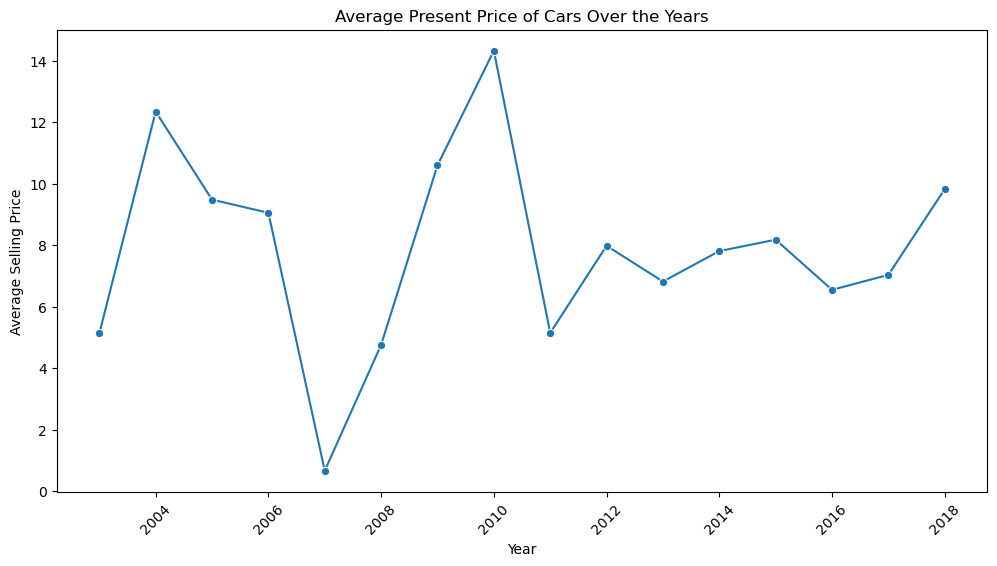

In [182]:
# Creating a line plot for the average selling price over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Present_Price', data=car_data, estimator='mean', ci=None, marker='o')

plt.title('Average Present Price of Cars Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)

plt.show()

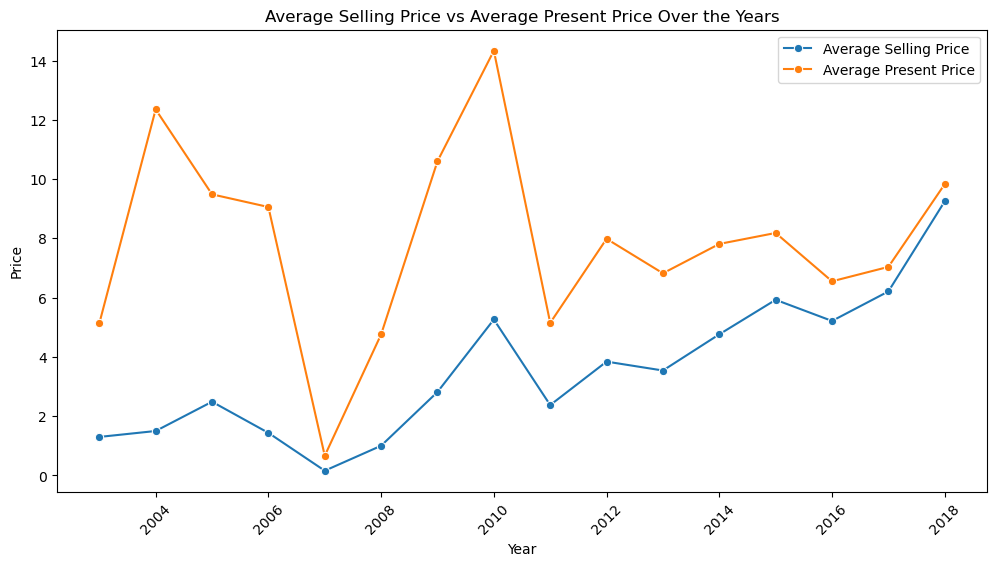

In [183]:
# Creating a line plot for both the average selling price and present price over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Selling_Price', data=car_data, estimator='mean', ci=None, marker='o', label='Average Selling Price')
sns.lineplot(x='Year', y='Present_Price', data=car_data, estimator='mean', ci=None, marker='o', label='Average Present Price')

plt.title('Average Selling Price vs Average Present Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()

plt.show()


# Trends Over Time:

### Both lines generally follow a similar trend, indicating a relationship between the selling price and the present price.

### In some years, the average selling price is close to the average present price, suggesting that cars are being sold at prices close to their current market value.

### In other years, there's a more noticeable gap between the two prices, which could indicate various market factors, such as depreciation, demand, and supply affecting the selling price

In [184]:
# Grouping the data by brand and calculating the average selling and present prices
brand_price_averages = car_data.groupby('Brand')['Selling_Price', 'Present_Price'].mean()

brand_price_averages.sort_values(by='Selling_Price', ascending=False)  # Sorting by average selling price for clarity



,Selling_Price,Present_Price
Brand,,
Toyota,10.414400,19.725200
Hyundai,5.483200,7.664600
Honda,4.953281,7.529063
Maruti Suzuki,4.655000,7.100600
KTM,1.337500,2.082500
Royal Enfield,1.144706,1.568235
Others,0.876250,1.323750
Bajaj,0.544091,0.877273
TVS,0.460000,0.731714


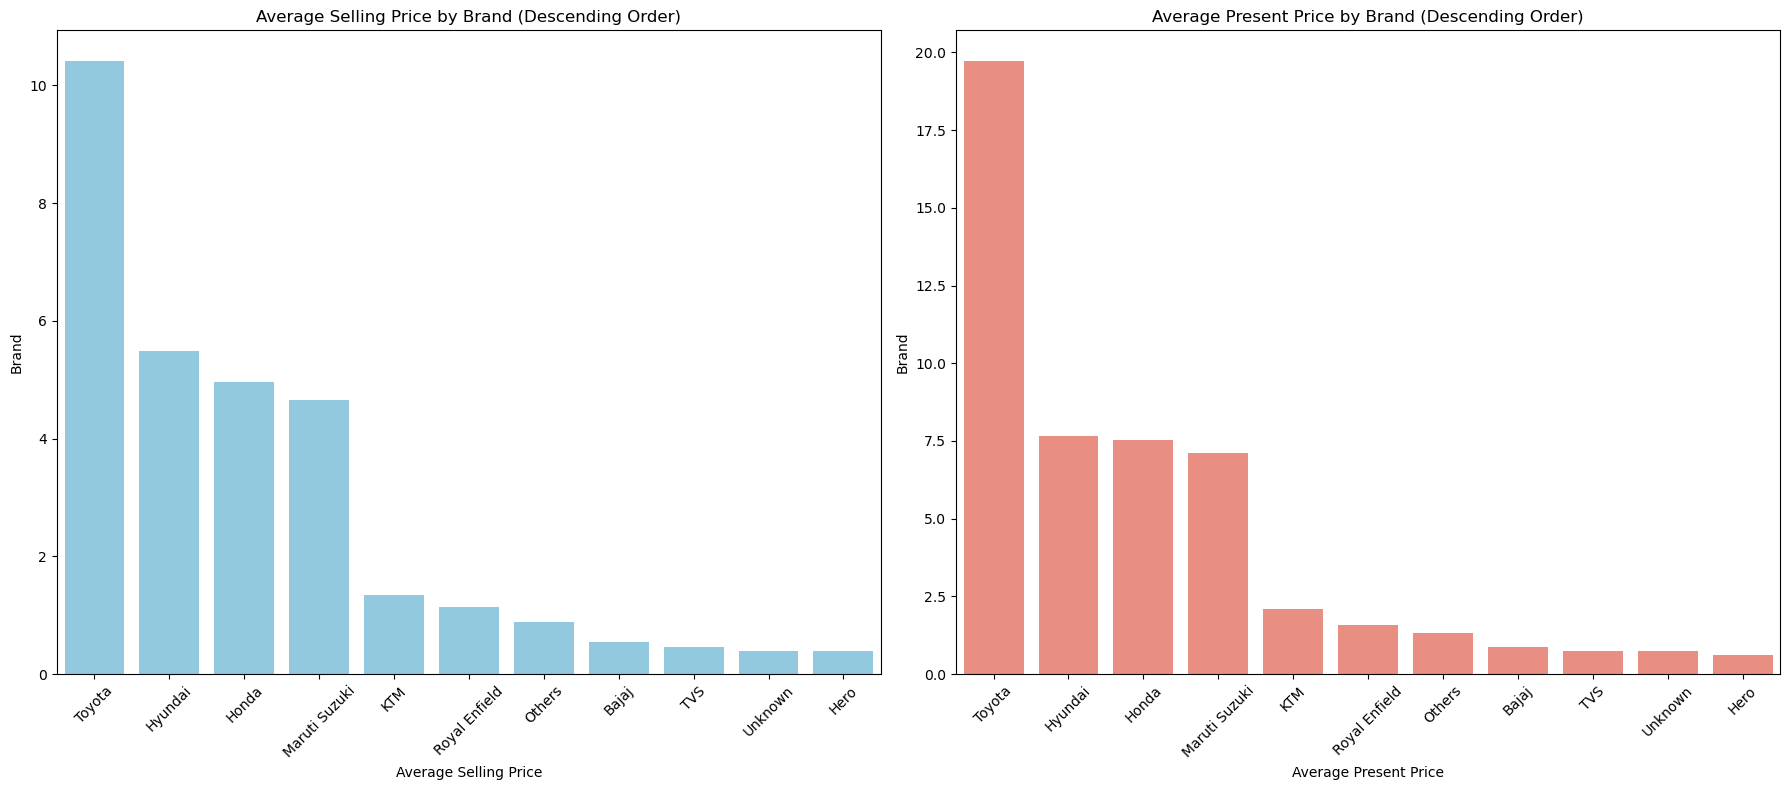

In [185]:
# Sorting the data in descending order based on average selling price
sorted_brand_prices = brand_price_averages.sort_values(by='Selling_Price', ascending=False)

# Creating separate bar graphs for sorted data
plt.figure(figsize=(18, 8))

# Plot for Average Selling Price in descending order
plt.subplot(1, 2, 1)
sns.barplot(y=sorted_brand_prices['Selling_Price'], x=sorted_brand_prices.index, color="skyblue")
plt.title('Average Selling Price by Brand (Descending Order)')
plt.xlabel('Average Selling Price')
plt.ylabel('Brand')
plt.xticks(rotation=45)

# Plot for Average Present Price in descending order
plt.subplot(1, 2, 2)
sns.barplot(y=sorted_brand_prices['Present_Price'], x=sorted_brand_prices.index, color="salmon")
plt.title('Average Present Price by Brand (Descending Order)')
plt.xlabel('Average Present Price')
plt.ylabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [186]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Brand
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Maruti Suzuki
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Maruti Suzuki
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Maruti Suzuki
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Maruti Suzuki
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Maruti Suzuki


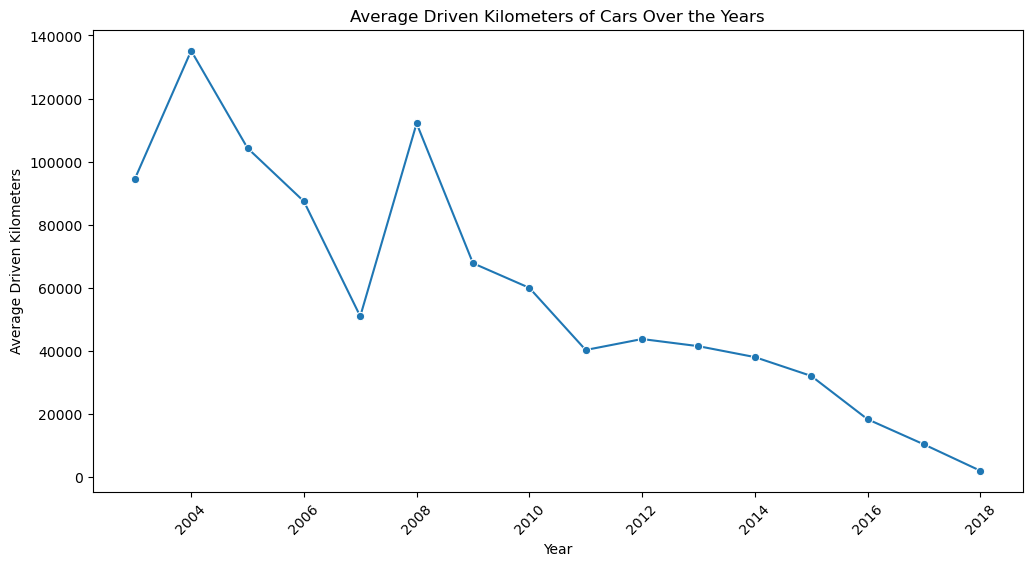

In [187]:
# Creating a line plot for the average driven kilometers over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Driven_kms', data=car_data, estimator='mean', ci=None, marker='o')

plt.title('Average Driven Kilometers of Cars Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Driven Kilometers')
plt.xticks(rotation=45)

plt.show()


### Trend: There is a general trend indicating that cars (from more recent years) have been driven fewer kilometers on average, which is expected as they would have had less time on the road

In [188]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Brand'],
      dtype='object')

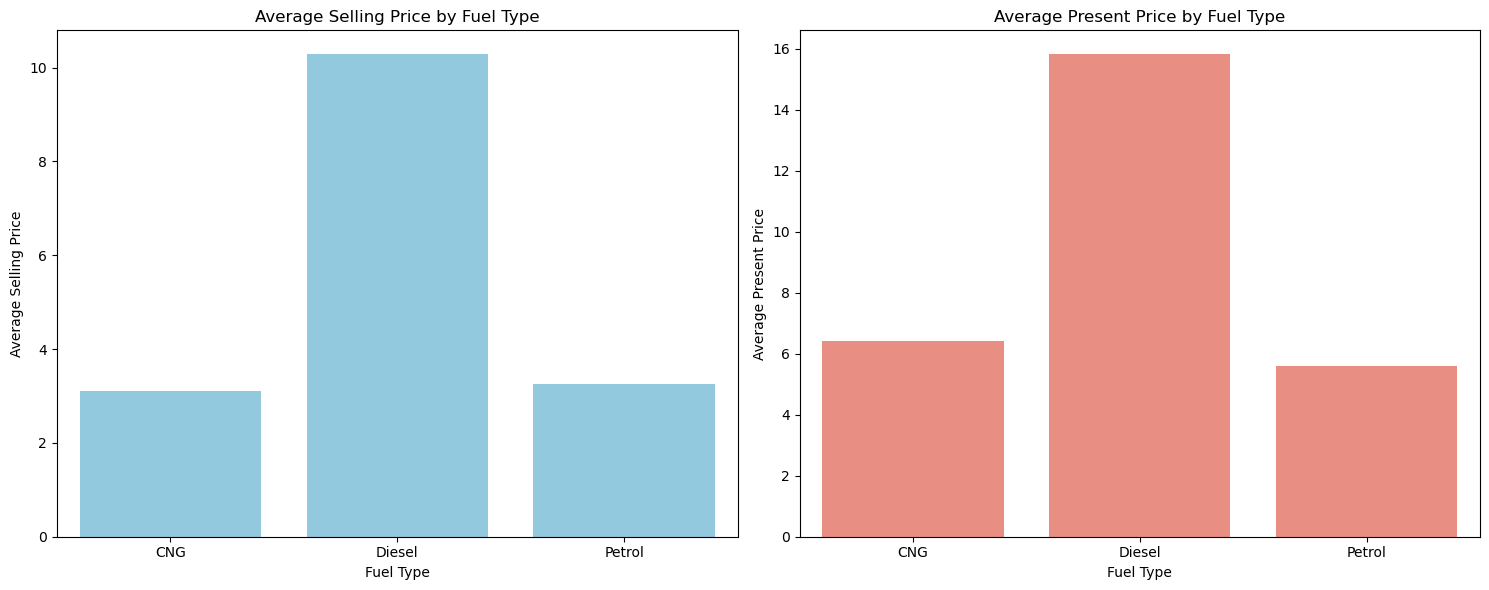

In [189]:
# Grouping the data by brand and calculating the average selling and present prices
fuel_type_price_averages1 = car_data.groupby('Fuel_Type')['Selling_Price', 'Present_Price'].mean()

fuel_type_price_averages1.sort_values(by='Selling_Price', ascending=False)  # Sorting by average selling price for clarity



# Creating separate bar graphs for average selling price and average present price based on fuel type
plt.figure(figsize=(15, 6))

# Plot for Average Selling Price
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=fuel_type_price_averages1.index, y="Selling_Price", data=fuel_type_price_averages1, color="skyblue")
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')

# Plot for Average Present Price
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x=fuel_type_price_averages1.index, y="Present_Price", data=fuel_type_price_averages1, color="salmon")
plt.title('Average Present Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Present Price')

plt.tight_layout()
plt.show()

In [190]:
# Grouping the data by brand and calculating the average selling and present prices
type = car_data.groupby('Selling_type')['Selling_Price', 'Present_Price'].mean()

type.sort_values(by='Selling_Price', ascending=False)  # Sorting by average selling price for clarity



,Selling_Price,Present_Price
Selling_type,,
Dealer,6.721692,10.886308
Individual,0.870943,1.635283


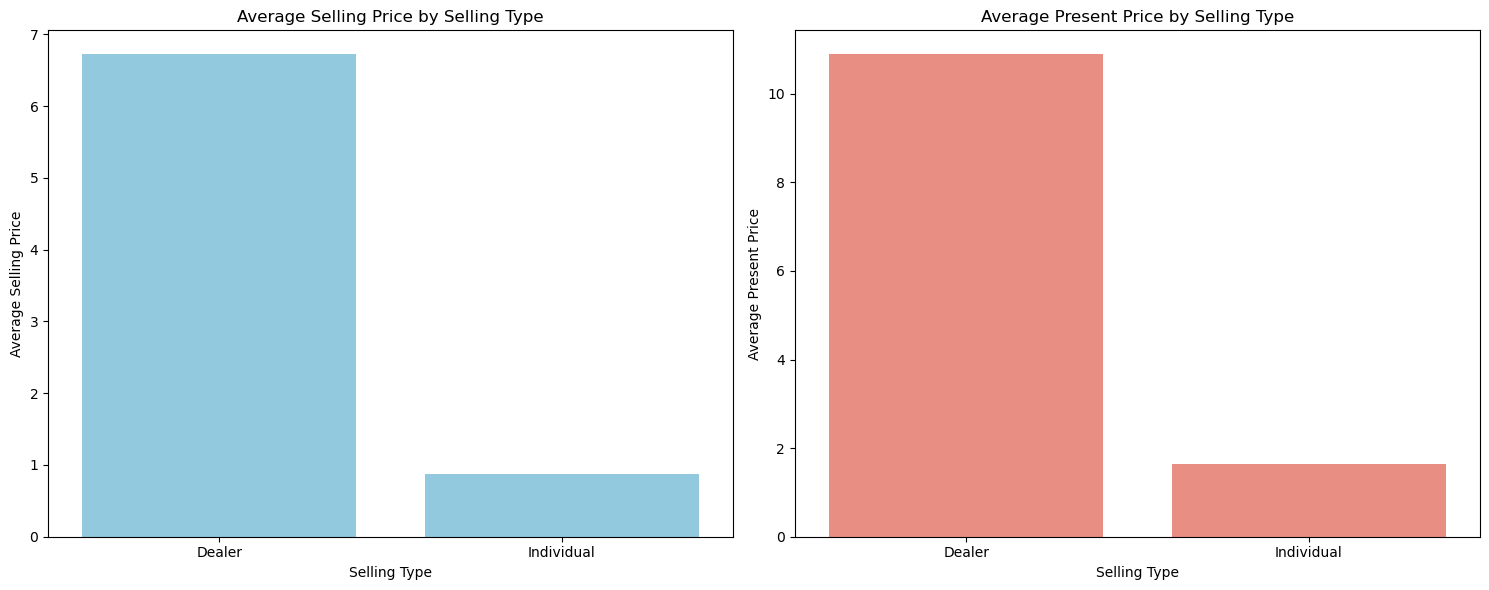

In [191]:


# Creating separate bar graphs for average selling price and average present price based on Selling Type
plt.figure(figsize=(15, 6))

# Plot for Average Selling Price
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=type.index, y="Selling_Price", data=type, color="skyblue")
plt.title('Average Selling Price by Selling Type')
plt.xlabel('Selling Type')
plt.ylabel('Average Selling Price')

# Plot for Average Present Price
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x=type.index, y="Present_Price", data=type, color="salmon")
plt.title('Average Present Price by Selling Type')
plt.xlabel('Selling Type')
plt.ylabel('Average Present Price')

plt.tight_layout()
plt.show()

In [192]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Brand'],
      dtype='object')

In [193]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()

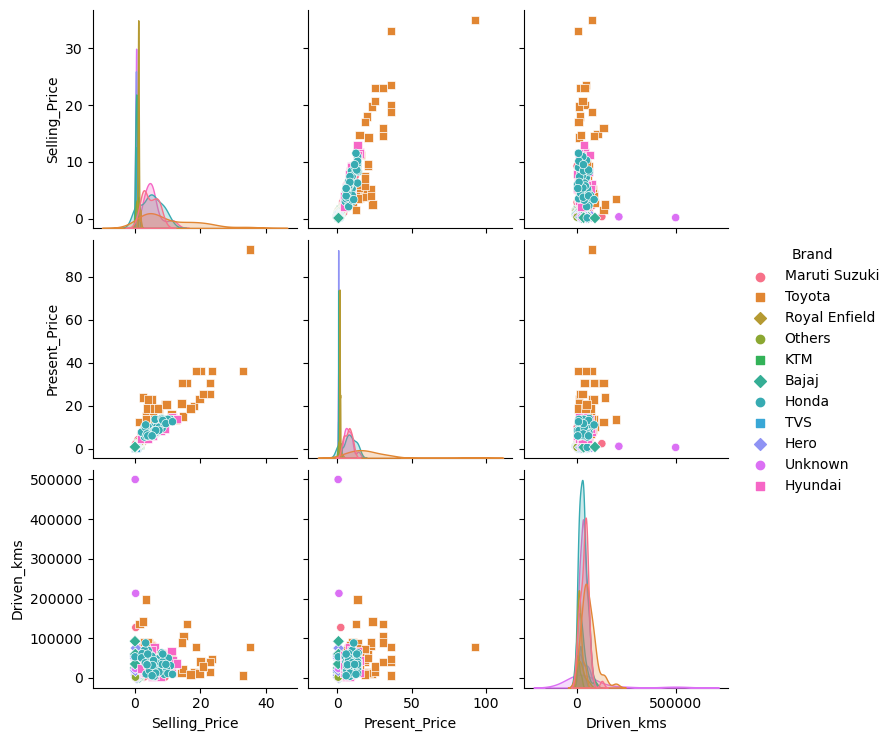

In [194]:
sns.pairplot(car_data, hue='Brand', markers=["o", "s", "D"],vars=['Selling_Price', 'Present_Price', 'Driven_kms'])
plt.show()

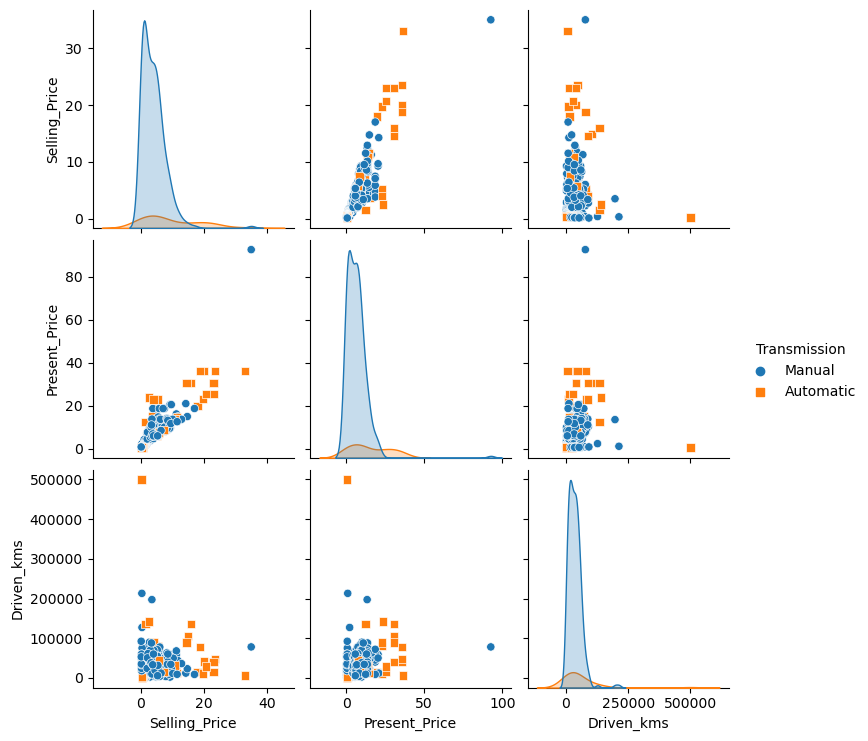

In [195]:
sns.pairplot(car_data, hue='Transmission', markers=["o", "s", "D"],vars=['Selling_Price', 'Present_Price', 'Driven_kms'])
plt.show()

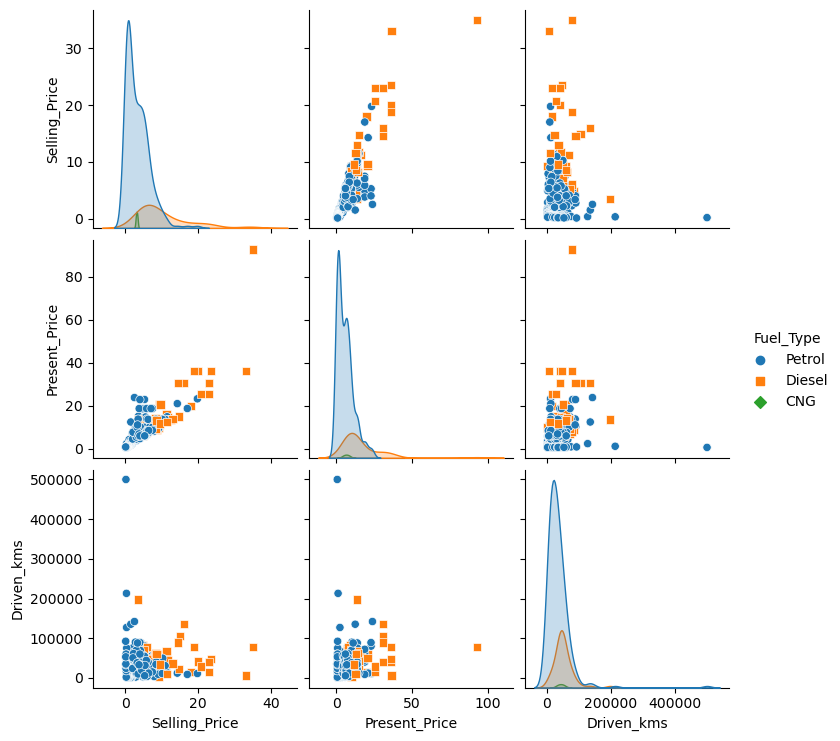

In [196]:
sns.pairplot(car_data, hue='Fuel_Type', markers=["o", "s", "D"],vars=['Selling_Price', 'Present_Price', 'Driven_kms'])
plt.show()

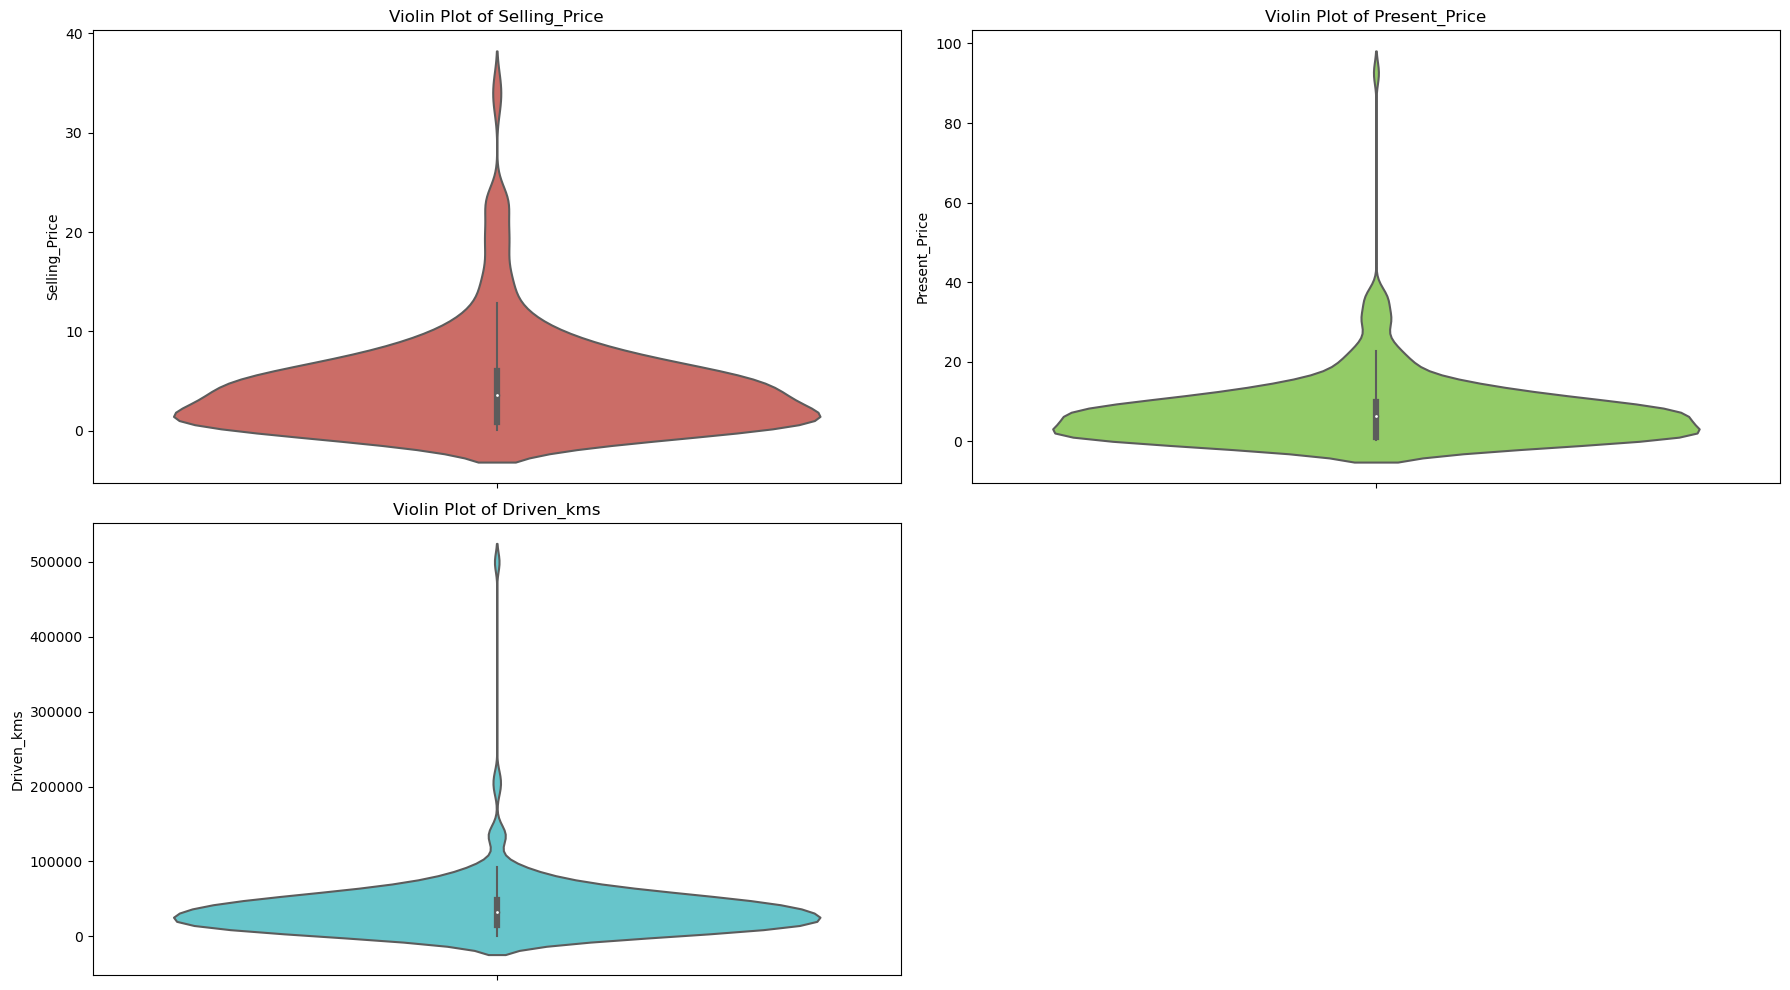

In [197]:
# Setting up the matplotlib figure
plt.figure(figsize=(18, 10))

# Creating a list of the columns to plot
columns_to_plot = [
   'Selling_Price', 'Present_Price', 'Driven_kms'
]

# Creating a violin plot for each column
for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 2, i+1)
    sns.violinplot(y=car_data[column], color=sns.color_palette("hls", 4)[i])
    plt.title(f'Violin Plot of {column}')


# Adjusting layout for better spacing
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Fuel_Type vs selling price')

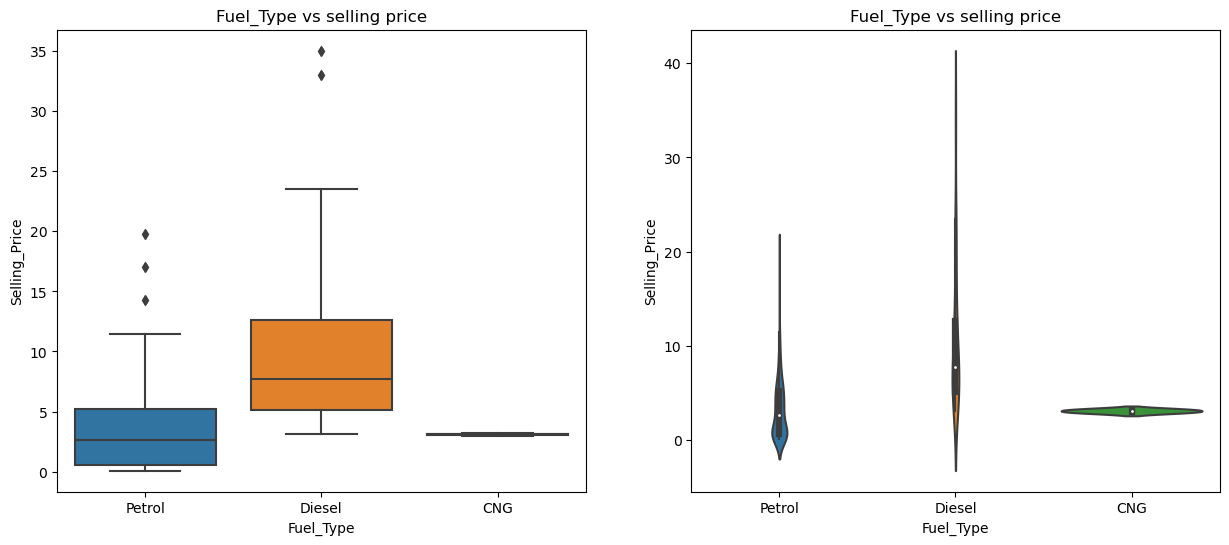

In [198]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Fuel_Type', y =  'Selling_Price', data = car_data, ax=ax[0]).set_title('Fuel_Type vs selling price')
sns.violinplot(x = 'Fuel_Type', y =  'Selling_Price', data = car_data, ax=ax[1]).set_title('Fuel_Type vs selling price')

In [199]:
car_data['Brand']=label_encoder.fit_transform(car_data['Brand'])

In [200]:
car_data['Fuel_Type']=label_encoder.fit_transform(car_data['Fuel_Type'])

In [201]:
car_data['Owner']=label_encoder.fit_transform(car_data['Owner'])

In [202]:
car_data['Selling_type']=label_encoder.fit_transform(car_data['Selling_type'])

In [203]:
car_data['Transmission']=label_encoder.fit_transform(car_data['Transmission'])

In [204]:
car_data['Year']=label_encoder.fit_transform(car_data['Year'])

In [205]:
car_data=car_data.drop(columns='Car_Name',axis=1)

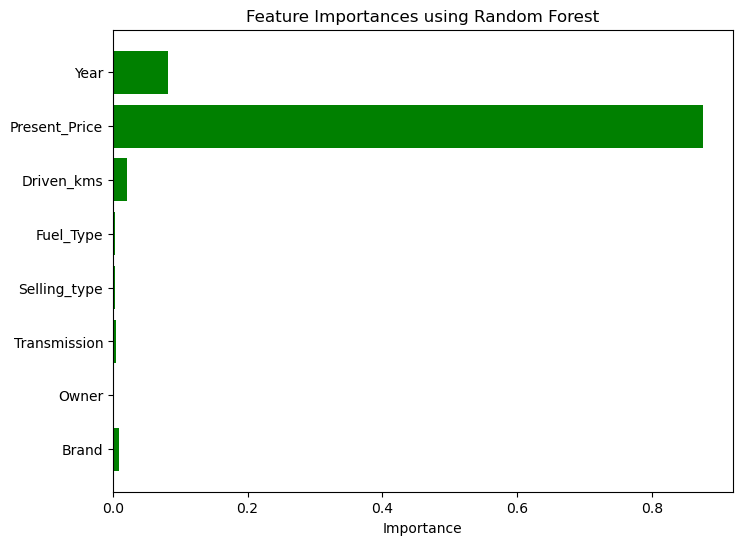

In [206]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define features and target variable
features = [ 'Year', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Brand']
target = 'Selling_Price'

# Prepare the data
X = car_data[features]
y = car_data[target]

# Train a Random Forest regressor
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X, y)

# Extract feature importances
feature_importances = rf.feature_importances_

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, align='center', color='GREEN')
plt.xlabel('Importance')
plt.title('Feature Importances using Random Forest')
plt.gca().invert_yaxis()  # Display the feature with the highest importance at the top
plt.show()

In [207]:
from sklearn.ensemble import RandomForestRegressor

# Separate the target variable (Salary) and the features
X = car_data.drop('Selling_Price', axis=1)
y = car_data['Selling_Price']

# Initialize and train a RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
1,Present_Price,0.873393
0,Year,0.081252
2,Driven_kms,0.022576
7,Brand,0.010249
4,Selling_type,0.005786
5,Transmission,0.003754
3,Fuel_Type,0.002919
6,Owner,0.000071


In [208]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
car_data[['Present_Price', 'Driven_kms']] = scaler.fit_transform(car_data[['Present_Price', 'Driven_kms']])

In [209]:
car_data

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Brand
0,11,3.35,-0.236256,-0.256224,2,0,1,0,5
1,10,4.75,0.221544,0.155911,1,0,1,0,5
2,14,7.25,0.257472,-0.773969,2,0,1,0,5
3,8,2.85,-0.403151,-0.817758,2,0,1,0,5
4,11,4.60,-0.087906,0.141743,1,0,1,0,5
...,...,...,...,...,...,...,...,...,...
296,13,9.50,0.460295,-0.076225,1,0,1,0,2
297,12,4.00,-0.200328,0.593804,2,0,1,0,2
298,6,3.35,0.390756,1.313340,2,0,1,0,2
299,14,11.50,0.564604,-0.719876,1,0,1,0,2


In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(car_data.drop('Selling_Price', axis=1), car_data['Selling_Price'], test_size=0.2, random_state=42)

In [223]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the random forest regressor
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fit the random forest model to the scaled training data
rf.fit(X_train, y_train)

# Predict on the scaled test set
y_pred_rf = rf.predict(X_test)

# Calculate performance metrics for the random forest model
MSE= mean_squared_error(y_test, y_pred_rf)
RMSE = MSE ** 0.5
R_Squared = r2_score(y_test, y_pred_rf)

MSE, RMSE, R_Squared

(0.8184101851098458, 0.9046602594951575, 0.9644719158574434)

In [224]:
import pandas as pd

# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# Optionally, reset the index if y_test is not already a simple range index
comparison_df.reset_index(drop=True, inplace=True)

# Print the DataFrame
print(comparison_df)


    Actual  Predicted
0     0.35    0.44089
1    10.11   10.22651
2     4.95    4.93220
3     0.15    0.22114
4     6.95    7.55218
..     ...        ...
56    5.50    5.10950
57    9.50    8.56296
58    2.10    2.78314
59    7.40    6.67955
60    0.30    0.24099

[61 rows x 2 columns]


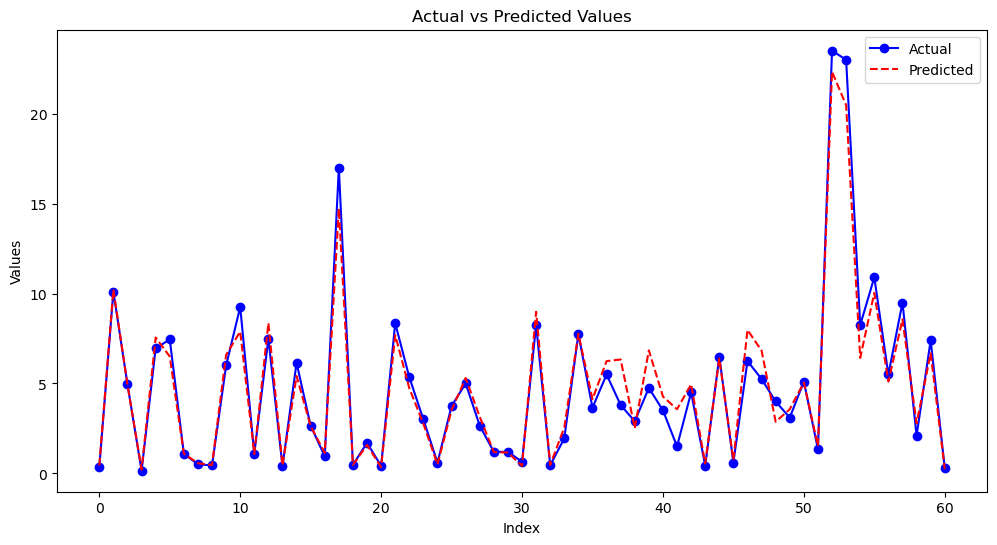

In [226]:
import matplotlib.pyplot as plt

# Assuming you have already created comparison_df as shown previously
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
comparison_df.reset_index(drop=True, inplace=True)

# Plotting the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Actual'], label='Actual', color='blue', marker='o')
plt.plot(comparison_df['Predicted'], label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

car price prediction with python.

In this project, I developed a predictive model for estimating car selling prices, incorporating factors such as 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_Type', 'Transmission', 'Owner', and 'Brand'. The model achieved an accuracy of 96% and a Root Mean Square Error (RMSE) of 0.9.